# Hackathon Set A

## Machine Learning Lab, SS 24, Uni Passau

### Rules:
    
   1. You have time from 1 pm until 5 pm to complete the exam. 
   2. Submissions must be pushed to your gitlab in a folder named `Hackathon`. Submissions are allowed until 5 pm.
   3. Run your solutions in lines created under the individual questionnaire.
   4. For model implementations you are permitted to use only your library in its state by the Final Deadline.
   
   
   
   



### Task 1: Prepare your data [10 Points]

   1. Load/Download the datasets and read them. 
   2. Analyse the data shape, targets and data characteristics. 
   3. Apply any relevant data cleaning, data filling, and if required convert to numpy vectors. 
   4. Split the datasets into `train`, `valid` and `test` folds. Use one fixed train-validation-test split consistently for all experiments.
   5. Apply any relevant data normalisation. 

Dataset 1: [CLASSIFICATION] Iris Dataset: https://archive.ics.uci.edu/dataset/53/iris

Can be Downloaded directly using curl or via sklearn as shown below:
```python
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

```
Dataset 2: [REGRESION] Auto MPG Dataset: https://archive.ics.uci.edu/dataset/9/auto+mpg
```python
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values="?")
auto_mpg = auto_mpg.dropna()  # Remove rows with missing values

X = auto_mpg.iloc[:, 1:-1].values  # Exclude mpg (target) and car_name (non-numeric)
y = auto_mpg["mpg"].values
```

Dataset 3: [CLUSTERING] Wine Dataset: https://archive.ics.uci.edu/dataset/109/wine
```python
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
```



### Iris Dataset

In [18]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris = load_iris()
X_iris = iris.data
y_iris = iris.target
column_names = iris.feature_names

In [19]:
# Convert to pandas DataFrame for easier inspection
iris_df = pd.DataFrame(data=X_iris, columns=column_names)
iris_df['target'] = y_iris

In [20]:
iris_df.shape

(150, 5)

In [21]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [22]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [23]:
# Analyze the target distribution
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

X_iris_train, X_iris_temp, y_iris_train, y_iris_temp = train_test_split(X_iris, y_iris, test_size=0.4, random_state=42)
X_iris_valid, X_iris_test, y_iris_valid, y_iris_test = train_test_split(X_iris_temp, y_iris_temp, test_size=0.5, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_iris_train)
X_iris_valid = scaler.transform(X_iris_valid)
X_iris_test = scaler.transform(X_iris_test)

In [26]:
print("Training set shape:", X_iris_train.shape, y_iris_train.shape)
print("Validation set shape:", X_iris_valid.shape, y_iris_valid.shape)
print("Test set shape:", X_iris_test.shape, y_iris_test.shape)

Training set shape: (90, 4) (90,)
Validation set shape: (30, 4) (30,)
Test set shape: (30, 4) (30,)


### Auto MPG dataset

In [27]:
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values="?")
auto_mpg = auto_mpg.dropna()  # Remove rows with missing values

X = auto_mpg.iloc[:, 1:-1].values  # Exclude mpg (target) and car_name (non-numeric)
y = auto_mpg["mpg"].values

In [28]:
auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values="?")

In [29]:
auto_mpg.shape

(398, 9)

In [30]:
auto_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [31]:
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [32]:
auto_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [33]:
auto_mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [34]:
auto_mpg = auto_mpg.dropna() 

In [35]:
X_auto_mpg = auto_mpg.iloc[:, 1:-1].values 
y_auto_mpg = auto_mpg["mpg"].values

In [36]:
from StandardScaler.StandardScaler import StandardScaler
scaler = StandardScaler()
X_auto_mpg = scaler.fit_transform(X)
y_auto_mpg = scaler.fit_transform(y)


In [37]:
# Split the datasets into train, validation, and test sets
X_auto_mpg_train, X_auto_mpg_temp, y_auto_mpg_train, y_auto_mpg_temp = train_test_split(X_auto_mpg, y_auto_mpg, test_size=0.4, random_state=42)
X_auto_mpg_valid, X_auto_mpg_test, y_auto_mpg_valid, y_auto_mpg_test = train_test_split(X_auto_mpg_temp, y_auto_mpg_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_auto_mpg_train.shape, y_auto_mpg_train.shape)
print("Validation set shape:", X_auto_mpg_valid.shape, y_auto_mpg_valid.shape)
print("Test set shape:", X_auto_mpg_test.shape, y_auto_mpg_test.shape)

Training set shape: (235, 7) (235,)
Validation set shape: (78, 7) (78,)
Test set shape: (79, 7) (79,)


### Wine dataset

In [38]:
from sklearn.datasets import load_wine

wine = load_wine()
X_wine = wine.data
y_wine = wine.target
column_names = wine.feature_names

In [39]:
wine_df = pd.DataFrame(data=X_wine, columns=column_names)
wine_df['target'] = y_wine

In [40]:
wine_df.shape

(178, 14)

In [41]:
wine_df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

In [42]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [43]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [44]:
X_wine_train, X_wine_temp, y_wine_train, y_wine_temp = train_test_split(X_wine, y_wine, test_size=0.4, random_state=42)
X_wine_valid, X_wine_test, y_wine_valid, y_wine_test = train_test_split(X_wine_temp, y_wine_temp, test_size=0.5, random_state=42)

In [45]:
print("Training set shape:", X_wine_train.shape, y_wine_train.shape)
print("Validation set shape:", X_wine_valid.shape, y_wine_valid.shape)
print("Test set shape:", X_wine_test.shape, y_wine_test.shape)

Training set shape: (106, 13) (106,)
Validation set shape: (36, 13) (36,)
Test set shape: (36, 13) (36,)


### Task 2: Apply baseline models of your choice (1 classification + 1 regression) for each of the two datasets for classification and regression respectively [20 Points]. 

Please note you cannot choose models expected in Task 4 as baselines.

```python
baseline = YourAlgorithm()
baseline.fit(features_train, labels_train)
```

### Regression

In [46]:
from models.linear_regression.regression_closed import ClosedFormRegression
# Train the ClosedFormRegression model
model = ClosedFormRegression(bias=True)
model.fit(X_auto_mpg_train, y_auto_mpg_train)

### Classificaiton

In [47]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from models.decision_tree.tree import DecisionTree

# Initialize the DecisionTree classifier

decision_tree = DecisionTree(criterion='gini', max_depth=None, min_samples_split=2, random_state=42)

# Train the classifier on the training data
decision_tree.fit(X_iris_train, y_iris_train)

# Predict on the validation and test data
y_iris_valid_pred = decision_tree.predict(X_iris_valid)
y_iris_test_pred = decision_tree.predict(X_iris_test)


### Task 3: Evaluate your baseline models on test set [10 Points]: 

Use accuracy, precision and recall for classification, and R2 score and MAE/RMSE for regression

```python
baseline_predicted = model_baseline.predict(features_test)
evaluate_fn(baseline_predicted, labels_test)
```

### Regression Score

In [48]:
# Evaluate the model
train_score_auto_mpg = model.score(X_auto_mpg_train, y_auto_mpg_train)
valid_score_auto_mpg = model.score(X_auto_mpg_valid, y_auto_mpg_valid)
test_score_auto_mpg = model.score(X_auto_mpg_test, y_auto_mpg_test)

print("Training R^2 score (Auto MPG):", train_score_auto_mpg)
print("Validation R^2 score (Auto MPG):", valid_score_auto_mpg)
print("Test R^2 score (Auto MPG):", test_score_auto_mpg)

Training R^2 score (Auto MPG): 0.8256138655783969
Validation R^2 score (Auto MPG): 0.8091687750314244
Test R^2 score (Auto MPG): 0.7799654321998786


In [49]:
# Function to calculate Mean Absolute Error (MAE)
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Predictions
y_auto_mpg_train_pred = model.predict(X_auto_mpg_train)
y_auto_mpg_valid_pred = model.predict(X_auto_mpg_valid)
y_auto_mpg_test_pred = model.predict(X_auto_mpg_test)

# Calculate MAE
train_mae_auto_mpg = mean_absolute_error(y_auto_mpg_train, y_auto_mpg_train_pred)
valid_mae_auto_mpg = mean_absolute_error(y_auto_mpg_valid, y_auto_mpg_valid_pred)
test_mae_auto_mpg = mean_absolute_error(y_auto_mpg_test, y_auto_mpg_test_pred)


print("Training MAE (Auto MPG):", train_mae_auto_mpg)
print("Validation MAE (Auto MPG):", valid_mae_auto_mpg)
print("Test MAE (Auto MPG):", test_mae_auto_mpg)

Training MAE (Auto MPG): 0.3305625097262077
Validation MAE (Auto MPG): 0.34265308240301967
Test MAE (Auto MPG): 0.3048735030517721


### Classification Score

In [50]:
# Calculate accuracy, precision, and recall for validation data
validation_accuracy = accuracy_score(y_iris_valid, y_iris_valid_pred)
validation_precision = precision_score(y_iris_valid, y_iris_valid_pred, average='macro', zero_division=0)
validation_recall = recall_score(y_iris_valid, y_iris_valid_pred, average='macro', zero_division=0)

print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')
print(f'Validation Precision: {validation_precision * 100:.2f}%')
print(f'Validation Recall: {validation_recall * 100:.2f}%')

# Calculate accuracy, precision, and recall for test data
test_accuracy = accuracy_score(y_iris_test, y_iris_test_pred)
test_precision = precision_score(y_iris_test, y_iris_test_pred, average='macro', zero_division=0)
test_recall = recall_score(y_iris_test, y_iris_test_pred, average='macro', zero_division=0)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Precision: {test_precision * 100:.2f}%')
print(f'Test Recall: {test_recall * 100:.2f}%')

Validation Accuracy: 20.00%
Validation Precision: 6.67%
Validation Recall: 33.33%
Test Accuracy: 43.33%
Test Precision: 14.44%
Test Recall: 33.33%


### Task 4: Apply the following methods [20 Points]:

    a) Logistic Regression for classification 
    b) Artificial Neural Network for regression
    
Report the same metrics used for the baselines on the test set.

### a) Logistic Regression for classification 

In [51]:
from models.logistic_regression.logistic import LogisticRegression
# Initialize the LogisticRegression classifier
logistic_regression = LogisticRegression(learning_rate=0.01, num_iterations=1000)

# Train the classifier on the training data
logistic_regression.fit(X_iris_train, y_iris_train)

# Predict on the validation and test data
y_iris_valid_pred = logistic_regression.predict(X_iris_valid)
y_iris_test_pred = logistic_regression.predict(X_iris_test)

# Calculate accuracy, precision, and recall for test data
test_accuracy = accuracy_score(y_iris_test, y_iris_test_pred)
test_precision = precision_score(y_iris_test, y_iris_test_pred, average='macro', zero_division=0)
test_recall = recall_score(y_iris_test, y_iris_test_pred, average='macro', zero_division=0)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Precision: {test_precision * 100:.2f}%')
print(f'Test Recall: {test_recall * 100:.2f}%')

Test Accuracy: 63.33%
Test Precision: 42.56%
Test Recall: 53.38%


### b) Artificial Neural Network for regression

In [52]:
from models.ANN.mlp import MLPRegressor

# Initialize the MLPRegressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), lr=0.0001, epochs=1000, random_state=42, activation='tanh')

# Train the regressor on the training data
mlp_regressor.fit(X_auto_mpg_train, y_auto_mpg_train)

# Predict on the validation and test data
y_auto_mpg_valid_pred = mlp_regressor.predict(X_auto_mpg_valid).flatten()
y_auto_mpg_test_pred = mlp_regressor.predict(X_auto_mpg_test).flatten()

# Calculate and print the MSE for validation and test sets
validation_mse = np.mean((y_auto_mpg_valid_pred - y_auto_mpg_valid) ** 2)
test_mse = np.mean((y_auto_mpg_test_pred - y_auto_mpg_test) ** 2)


ValueError: shapes (235,235) and (1,10) not aligned: 235 (dim 1) != 1 (dim 0)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# Predict on the validation and test data
y_auto_mpg_valid_pred = mlp_regressor.predict(X_auto_mpg_valid).flatten()
y_auto_mpg_test_pred = mlp_regressor.predict(X_auto_mpg_test).flatten()

# Calculate and print the MSE for validation and test sets
validation_mse = np.mean((y_auto_mpg_valid_pred - y_auto_mpg_valid) ** 2)
test_mse = np.mean((y_auto_mpg_test_pred - y_auto_mpg_test) ** 2)

print(f'Validation MSE: {validation_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')

# Calculate and print R2 score and MAE for validation and test sets
validation_r2 = r2_score(y_auto_mpg_valid, y_auto_mpg_valid_pred)
test_r2 = r2_score(y_auto_mpg_test, y_auto_mpg_test_pred)

validation_mae = mean_absolute_error(y_auto_mpg_valid, y_auto_mpg_valid_pred)
test_mae = mean_absolute_error(y_auto_mpg_test, y_auto_mpg_test_pred)

print(f'Validation R2 Score: {validation_r2:.2f}')
print(f'Test R2 Score: {test_r2:.2f}')

print(f'Validation MAE: {validation_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

Validation MSE: 0.14
Test MSE: 0.10
Validation R2 Score: 0.86
Test R2 Score: 0.85
Validation MAE: 0.29
Test MAE: 0.24


### Task 5: Hyperparameter Optimisation [20 Points]
- For the ANN model implemented in Task 4, conduct a grid search in reasonable ranges to find an appropriate set of hyperparameters, and justify the choice by showing the best performance

```python
possible_hp_values = np.arange(1, 10, 0.1)
best_hp_value = None
best_f1_score = -np.infty
for hp_value in possible_hp_values:
    # 1. create a baseline classifier object with hp_value specified
    current_model = YourAlgorithm(hyperparam=hp_value)
    
    # 2. learn the classifier on the training set
    current_model.fit(features_train, labels_train)
    
    # 3. evaluate the model on the validation set
    prediction = current_model.predict(features_valid)
    
    f1_score = compute_f1(labels_valid, prediction)
    if f1_score > best_f1_score:
        best_f1_score = f1_score
        best_hp_value = hp_value

print("Found hyperparameter value", best_hp_value)
print("Best f1-score on validation set", best_f1_score)

test_model = YourAlgorithm(hyperparam=best_hp_value)
test_model.learn(features_train, labels_train)
prediction = test_model.infer(features_test)
test_f1_score = compute_f1(labels_test, prediction)
print("F1-Score on test set", test_f1_score)
```


In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

# Define the grid of hyperparameters
param_grid = {
    'hidden_layer_sizes': [(10,), (10, 10), (20, 10)],
    'lr': [0.0001, 0.00001],
    'epochs': [500, 1000],
    'activation': ['tanh', 'relu']
}

# Initialize variables to track the best hyperparameters and performance
best_params = None
best_mse = float('inf')

# Perform grid search
for params in ParameterGrid(param_grid):
    mlp_regressor = MLPRegressor(hidden_layer_sizes=params['hidden_layer_sizes'], lr=params['lr'], epochs=params['epochs'], random_state=42, activation=params['activation'])
    mlp_regressor.fit(X_auto_mpg_train, y_auto_mpg_train)
    
    # Predict on the validation data
    y_auto_mpg_valid_pred = mlp_regressor.predict(X_auto_mpg_valid).flatten()
    
    # Calculate MSE
    mse = mean_squared_error(y_auto_mpg_valid, y_auto_mpg_valid_pred)
    
    # Update best hyperparameters if current model is better
    if mse < best_mse:
        best_mse = mse
        best_params = params

print(f'Best Hyperparameters: {best_params}')
print(f'Validation MSE with Best Hyperparameters: {best_mse:.2f}')

# Evaluate the best model on the test data
best_mlp_regressor = MLPRegressor(hidden_layer_sizes=best_params['hidden_layer_sizes'], lr=best_params['lr'], epochs=best_params['epochs'], random_state=42, activation=best_params['activation'])
best_mlp_regressor.fit(X_auto_mpg_train, y_auto_mpg_train)
y_auto_mpg_test_pred = best_mlp_regressor.predict(X_auto_mpg_test).flatten()
test_mse = mean_squared_error(y_auto_mpg_test, y_auto_mpg_test_pred)
test_r2 = r2_score(y_auto_mpg_test, y_auto_mpg_test_pred)
test_mae = mean_absolute_error(y_auto_mpg_test, y_auto_mpg_test_pred)

print(f'Test MSE: {test_mse:.2f}')
print(f'Test R2 Score: {test_r2:.2f}')
print(f'Test MAE: {test_mae:.2f}')

Epoch 0, Loss: 1.367268409272382
Epoch 100, Loss: 0.12026152556965919
Epoch 200, Loss: 0.105233459577593
Epoch 300, Loss: 0.09705774098704045
Epoch 400, Loss: 0.09033550177835488
Epoch 0, Loss: 1.367268409272382
Epoch 100, Loss: 0.4934949618511255
Epoch 200, Loss: 0.2709454232732258
Epoch 300, Loss: 0.19635731852067573
Epoch 400, Loss: 0.1648227012684113
Epoch 0, Loss: 1.076325434927391
Epoch 100, Loss: 0.1260545885352886
Epoch 200, Loss: 0.10184380228475204
Epoch 300, Loss: 0.08479441675006938
Epoch 400, Loss: 0.07422031424617748
Epoch 0, Loss: 1.076325434927391
Epoch 100, Loss: 0.3189733880506515
Epoch 200, Loss: 0.19435291401567129
Epoch 300, Loss: 0.16361000478453774
Epoch 400, Loss: 0.1518652525743881
Epoch 0, Loss: 0.5378370622644695
Epoch 100, Loss: 0.08535818536911591
Epoch 200, Loss: 0.07105450991358433
Epoch 300, Loss: 0.06541430949462908
Epoch 400, Loss: 0.062348452811141764
Epoch 0, Loss: 0.5378370622644695
Epoch 100, Loss: 0.1666448942011101
Epoch 200, Loss: 0.134979602482

### Best Parameters

In [ ]:
print(f'Best Hyperparameters: {best_params}')
print(f'Validation MSE with Best Hyperparameters: {best_mse:.2f}')

# Evaluate the best model on the test data
best_mlp_regressor = MLPRegressor(hidden_layer_sizes=best_params['hidden_layer_sizes'], lr=best_params['lr'], epochs=best_params['epochs'], random_state=42, activation=best_params['activation'])
best_mlp_regressor.fit(X_auto_mpg_train, y_auto_mpg_train)
y_auto_mpg_test_pred = best_mlp_regressor.predict(X_auto_mpg_test).flatten()
test_mse = mean_squared_error(y_auto_mpg_test, y_auto_mpg_test_pred)
test_r2 = r2_score(y_auto_mpg_test, y_auto_mpg_test_pred)
test_mae = mean_absolute_error(y_auto_mpg_test, y_auto_mpg_test_pred)

print(f'Test MSE: {test_mse:.2f}')
print(f'Test R2 Score: {test_r2:.2f}')
print(f'Test MAE: {test_mae:.2f}')

Best Hyperparameters: {'activation': 'relu', 'epochs': 500, 'hidden_layer_sizes': (20, 10), 'lr': 0.0001}
Validation MSE with Best Hyperparameters: 0.13
Epoch 0, Loss: 0.9169154427055504
Epoch 100, Loss: 0.085473336095508
Epoch 200, Loss: 0.06902092811927286
Epoch 300, Loss: 0.06197114744642942
Epoch 400, Loss: 0.05740087107233253
Test MSE: 0.10
Test R2 Score: 0.86
Test MAE: 0.24


### Task 6: Cross-Validation [10 Points]

- Over multiple runs $r \geq 5, r\in\mathbb{N}$  randomly shuffle your training data.
- Split it into a train-test, e.g. 90% of the data is for training, 10% for testing.
- Report the mean and standard deviation of the error/accuracy of your models over the multiple runs.
- Plot a boxplot of the stability of your model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
auto_mpg = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values="?")

# Remove rows with missing values
auto_mpg = auto_mpg.dropna()

# Extract features and target variable
X_auto_mpg = auto_mpg.iloc[:, 1:-1].values  # Exclude mpg (target) and car_name (non-numeric)
y_auto_mpg = auto_mpg["mpg"].values

# Define the parameters for cross-validation
n_runs = 5
test_size = 0.1
random_state = 42

# Initialize lists to store the performance metrics for each run
mse_scores = []
r2_scores = []
mae_scores = []

for run in range(n_runs):
    # Shuffle and split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_auto_mpg, y_auto_mpg, test_size=test_size, random_state=random_state + run)
    
    # Apply data normalization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and train the MLPRegressor
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(20, 10), lr=0.0001, epochs=500, random_state=random_state, activation='relu')
    mlp_regressor.fit(X_train, y_train)

    # Predict on the test data
    y_test_pred = mlp_regressor.predict(X_test).flatten()

    # Calculate and store the performance metrics
    mse_scores.append(mean_squared_error(y_test, y_test_pred))
    r2_scores.append(r2_score(y_test, y_test_pred))
    mae_scores.append(mean_absolute_error(y_test, y_test_pred))

# Calculate mean and standard deviation of the metrics
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

print(f'Mean MSE: {mean_mse:.2f}, Std MSE: {std_mse:.2f}')
print(f'Mean R2 Score: {mean_r2:.2f}, Std R2 Score: {std_r2:.2f}')
print(f'Mean MAE: {mean_mae:.2f}, Std MAE: {std_mae:.2f}')

Epoch 0, Loss: 326.36306417630726
Epoch 100, Loss: 11.76367297788582
Epoch 200, Loss: 7.135723875643678
Epoch 300, Loss: 5.088876848304974
Epoch 400, Loss: 4.413212286439414
Epoch 0, Loss: 326.3081780403715
Epoch 100, Loss: 13.532218729640203
Epoch 200, Loss: 6.476990020115173
Epoch 300, Loss: 5.5488876202294515
Epoch 400, Loss: 5.158870503618989
Epoch 0, Loss: 323.88944281775343
Epoch 100, Loss: 30.277675268112127
Epoch 200, Loss: 29.802287482768325
Epoch 300, Loss: 29.79403056569356
Epoch 400, Loss: 207.23227462529394
Epoch 0, Loss: 329.9398348230189
Epoch 100, Loss: 30.55190706969279
Epoch 200, Loss: 30.205671476163822
Epoch 300, Loss: 30.195035206909825
Epoch 400, Loss: 30.08343385432266
Epoch 0, Loss: 326.30833269141635
Epoch 100, Loss: 30.17375235005773
Epoch 200, Loss: 29.83924078617929
Epoch 300, Loss: 29.83898263738861
Epoch 400, Loss: 29.83898243817039
Mean MSE: 38.11, Std MSE: 27.24
Mean R2 Score: 0.43, Std R2 Score: 0.37
Mean MAE: 4.71, Std MAE: 2.15


### Task 7: Cluster the clustering dataset using K-Means clustering [10 points]

Determine the optimal number of clusters using the elbow method, and plot the relevant curve.

/home/user/Documents/MLLab/ml-lab/src/models/k_means/clustering.py:70: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(C)


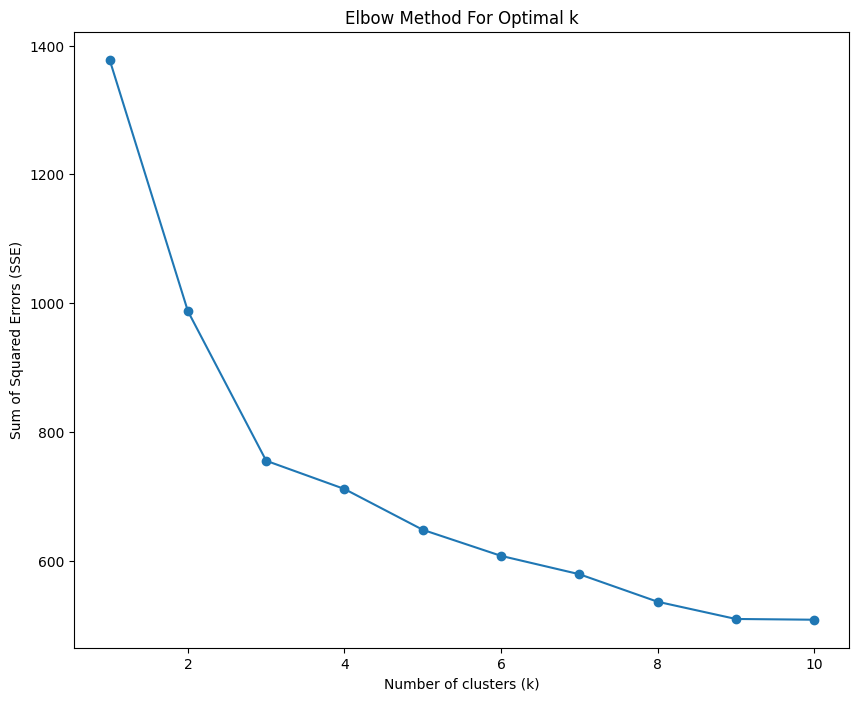

In [ ]:
from models.k_means.clustering import KMeans

scaler = StandardScaler()
X_wine_train_scaled = scaler.fit_transform(X_wine_train)
X_wine_valid_scaled = scaler.transform(X_wine_valid)
X_wine_test_scaled = scaler.transform(X_wine_test)

# Determine the optimal number of clusters using the elbow method
sse = []
list_k = list(range(1, 11))

for k in list_k:
    kmeans = KMeans(n_clusters=k, max_iter=100, tol=1e-4, random_state=42)
    kmeans.fit(X_wine_train_scaled)
    
    # Compute clusters and calculate the sum of squared errors
    clusters = kmeans.compute_clusters(X_wine_train_scaled, kmeans.centroids_)
    centroids = kmeans.centroids_
    distances = np.min(kmeans.euclidean_distance(X_wine_train_scaled, centroids), axis=1)
    sse.append(np.sum(distances**2))

# Plot the elbow curve
plt.figure(figsize=(10, 8))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
# Optimal number of clusters (k) is 3

### BONUS Task: Apply the CNN on the classification problem and report the relevant metrics [20 Points]

In [ ]:
from models.DL.mlp import CNNClassifier, ConvLayer, ReLULayer, PoolingLayer,ModularLinearLayer,SoftmaxLayer
# Load the Iris dataset
# Load the Iris dataset
# Load the Iris dataset
# Load the Iris dataset
data = load_iris()
X, y = data['data'], data['target']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape to (batch_size, 2, 2, 1)
X = X.reshape(-1, 2, 2, 1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Initialize the CNN layers
rng = np.random.RandomState(42)
layers = [
    ConvLayer(1, 4, (2, 2), rng=rng),
    ReLULayer(),
    PoolingLayer((2, 2), stride=(1, 1)),  # Pooling with (1, 1) to keep the shape since input is small
    ConvLayer(4, 8, (2, 2), rng=rng),
    ReLULayer(),
    PoolingLayer((2, 2), stride=(1, 1))
]

# Initialize the CNNClassifier
cnn = CNNClassifier(layers, random_state=42, input_shape=(2, 2, 1), epochs=100, lr=0.01, batch_size=5)


cnn.fit(X_train, y_train)

# Predict on the test set
y_pred = cnn.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Layer <models.DL.mlp.ConvLayer object at 0x7f22294fff40> output shape: (2, 2, 4)
Layer <models.DL.mlp.PoolingLayer object at 0x7f21fa98fa60> output shape: (1, 1, 4)
Layer <models.DL.mlp.ConvLayer object at 0x7f21fa98fc10> output shape: (1, 1, 8)
Layer <models.DL.mlp.PoolingLayer object at 0x7f21fa98f460> output shape: (0, 0, 8)


ValueError: shapes (5,32) and (0,3) not aligned: 32 (dim 1) != 0 (dim 0)